In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set seed for repatable results
np.random.seed(42)

#set data size
n = 1000
start_date = datetime(2023, 6, 1)

# Create dataset
data = pd.DataFrame({
    "customer_id": np.random.randint(1000, 1100, n),
    "region": np.random.choice(["Pune", "Mumbai", "Nashik"], n),
    "usage_type": np.random.choice(["Agriculture", "Residential", "Industrial"], n),
    "date": [start_date + timedelta(days=i%180) for i in range(n)],
    "raw_hardness_ppm": np.random.randint(400, 700, n),
    "treated_hardness_ppm": np.random.randint(100, 300, n),
    "daily_usage_liters": np.random.randint(100, 2000, n),
    "system_uptime_percent": np.random.uniform(85, 100, n),
    "days_since_maintenance": np.random.randint(1, 90, n)
})

# Calculate % improvement
data["reduction_percent"] = ((data["raw_hardness_ppm"] - data["treated_hardness_ppm"]) / data["raw_hardness_ppm"]) * 100

# Preview the data
data.head()

,customer_id,region,usage_type,date,raw_hardness_ppm,treated_hardness_ppm,daily_usage_liters,system_uptime_percent,days_since_maintenance,reduction_percent
0,1051,Mumbai,Agriculture,2023-06-01,434,166,533,99.640490,70,61.751152
1,1092,Nashik,Residential,2023-06-02,468,247,1235,90.172264,17,47.222222
2,1014,Pune,Residential,2023-06-03,448,216,474,90.059664,26,51.785714
3,1071,Nashik,Residential,2023-06-04,473,193,1182,89.678679,21,59.196617
4,1060,Mumbai,Residential,2023-06-05,591,262,1166,86.831673,72,55.668359


In [2]:
data.to_csv('guardneer_water_data.csv', index=False)

In [3]:
import pandas as pd

#Upload CSV
from google.colab import files
uploaded = files.upload()

# Read data
data = pd.read_csv('guardneer_water_data.csv')
data.head()

Saving guardneer_water_data.csv to guardneer_water_data (1).csv


,customer_id,region,usage_type,date,raw_hardness_ppm,treated_hardness_ppm,daily_usage_liters,system_uptime_percent,days_since_maintenance,reduction_percent
0,1051,Mumbai,Agriculture,2023-06-01,434,166,533,99.640490,70,61.751152
1,1092,Nashik,Residential,2023-06-02,468,247,1235,90.172264,17,47.222222
2,1014,Pune,Residential,2023-06-03,448,216,474,90.059664,26,51.785714
3,1071,Nashik,Residential,2023-06-04,473,193,1182,89.678679,21,59.196617
4,1060,Mumbai,Residential,2023-06-05,591,262,1166,86.831673,72,55.668359


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1000 non-null   int64  
 1   region                  1000 non-null   object 
 2   usage_type              1000 non-null   object 
 3   date                    1000 non-null   object 
 4   raw_hardness_ppm        1000 non-null   int64  
 5   treated_hardness_ppm    1000 non-null   int64  
 6   daily_usage_liters      1000 non-null   int64  
 7   system_uptime_percent   1000 non-null   float64
 8   days_since_maintenance  1000 non-null   int64  
 9   reduction_percent       1000 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


In [5]:
data.isnull().sum()

,0
customer_id,0
region,0
usage_type,0
date,0
raw_hardness_ppm,0
treated_hardness_ppm,0
daily_usage_liters,0
system_uptime_percent,0
days_since_maintenance,0
reduction_percent,0


In [6]:
data.describe()

,customer_id,raw_hardness_ppm,treated_hardness_ppm,daily_usage_liters,system_uptime_percent,days_since_maintenance,reduction_percent
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1049.128000,545.609000,202.09800,1039.703000,92.376920,45.939000,61.962821
std,29.573505,84.683194,56.08058,532.479951,4.328773,25.810957,12.510864
min,1000.000000,400.000000,100.00000,104.000000,85.002798,1.000000,26.237624
25%,1023.000000,471.750000,157.00000,584.750000,88.637160,23.750000,53.234048
50%,1050.000000,545.000000,203.00000,1035.000000,92.387210,47.000000,62.998254
75%,1074.000000,617.000000,250.00000,1466.500000,96.079784,69.000000,72.044413
max,1099.000000,699.000000,299.00000,1995.000000,99.953638,89.000000,85.109489


In [7]:
data = data[data["treated_hardness_ppm"] < data["raw_hardness_ppm"]]

In [8]:
data["reduction_percent"] = ((data["raw_hardness_ppm"] - data["treated_hardness_ppm"]) / data["raw_hardness_ppm"]) * 100

<Axes: ylabel='daily_usage_liters'>

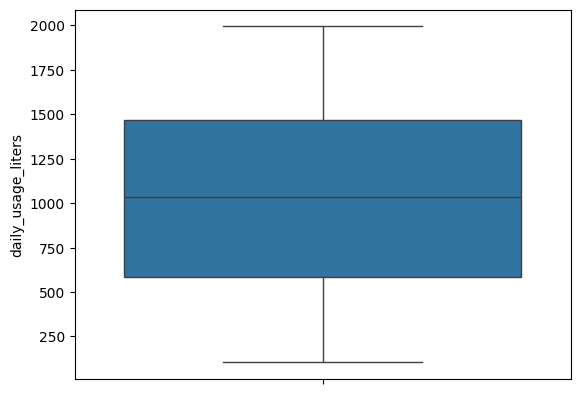

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data["daily_usage_liters"])

In [10]:
# Remove very high usage
data = data[data["daily_usage_liters"] < 3000]

# Cap reduction_percent to max 100%
data["reduction_percent"] = data["reduction_percent"].clip(0, 100)

In [11]:
def performance_label(x):
  if x >= 60:
    return "Excellent"
  elif x >= 40:
    return "Average"
  else:
    return "Poor"
  data["performance_label"] = data["reduction_percent"].apply(performance_label


IndentationError: unexpected indent (ipython-input-11-2917164440.py, line 4)

In [12]:
def performance_label(x):
    if x >= 60:
        return "Excellent"
    elif x >= 40:
        return "Average"
    else:
        return "Poor"

data["performance_status"] = data["reduction_percent"].apply(performance_label)


In [13]:
data["risk_flag"] = ((data["system_uptime_percent"] < 90) |
                     (data["days_since_maintenance"] > 60))

In [15]:
data.to_csv("guardneer_clean_data.csv", index=False)

In [18]:
import pandas as pd
data = pd.read_csv("guardneer_clean_data.csv")

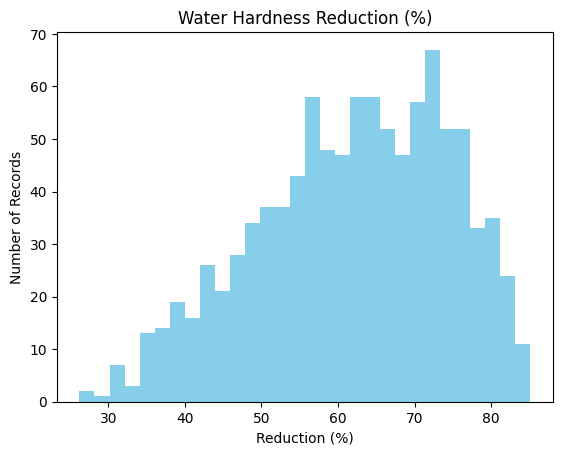

In [19]:
import matplotlib.pyplot as plt
plt.hist(data["reduction_percent"], bins=30, color="skyblue")
plt.title("Water Hardness Reduction (%)")
plt.xlabel("Reduction (%)")
plt.ylabel("Number of Records")
plt.show()

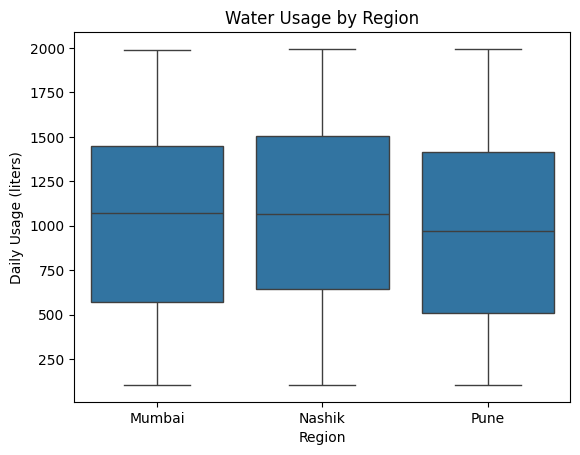

In [20]:
import seaborn as sns
sns.boxplot(x="region", y="daily_usage_liters", data=data)
plt.title("Water Usage by Region")
plt.xlabel("Region")
plt.ylabel("Daily Usage (liters)")
plt.show()

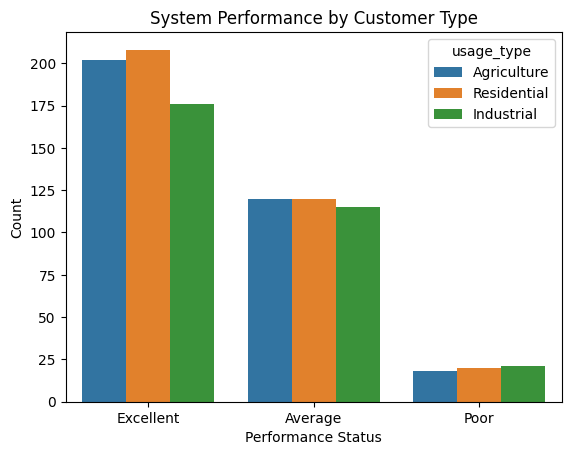

In [21]:
sns.countplot(x="performance_status", hue="usage_type", data=data)
plt.title("System Performance by Customer Type")
plt.xlabel("Performance Status")
plt.ylabel("Count")
plt.show()

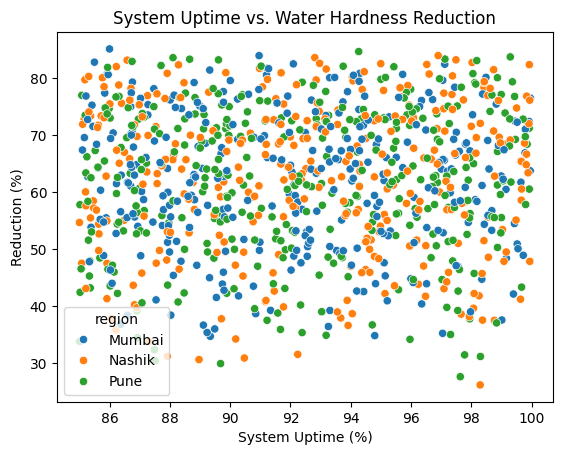

In [22]:
sns.scatterplot(x="system_uptime_percent", y="reduction_percent", hue="region", data=data)
plt.title("System Uptime vs. Water Hardness Reduction")
plt.xlabel("System Uptime (%)")
plt.ylabel("Reduction (%)")
plt.show()

risk_flag
True     567
False    433
Name: count, dtype: int64


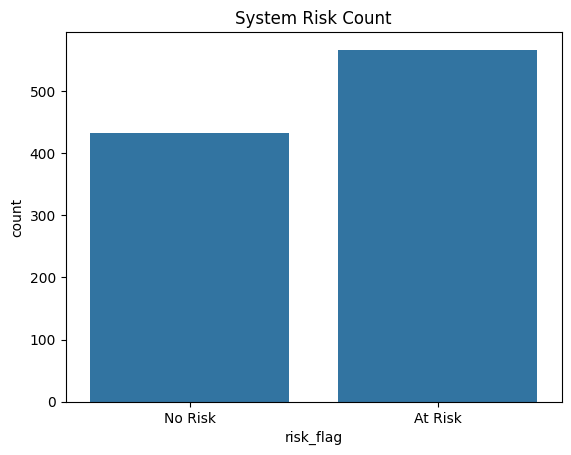

In [23]:
risk_summary = data["risk_flag"].value_counts()
print(risk_summary)

sns.countplot(x="risk_flag", data=data)
plt.title("System Risk Count")
plt.xticks([0, 1], ['No Risk', 'At Risk'])
plt.show()


In [24]:
data.groupby("region")["reduction_percent"].mean().sort_values(ascending=False)


,reduction_percent
region,
Nashik,62.397238
Mumbai,61.825185
Pune,61.677700


In [25]:
data.groupby("usage_type")["daily_usage_liters"].mean().sort_values(ascending=False)


,daily_usage_liters
usage_type,
Industrial,1050.028846
Agriculture,1045.685294
Residential,1024.600575


In [26]:
data[data["risk_flag"] == True][["customer_id", "region", "usage_type", "reduction_percent"]].head(10)


,customer_id,region,usage_type,reduction_percent
0,1051,Mumbai,Agriculture,61.751152
3,1071,Nashik,Residential,59.196617
4,1060,Mumbai,Residential,55.668359
5,1020,Pune,Industrial,70.000000
8,1074,Mumbai,Industrial,71.168437
9,1074,Mumbai,Industrial,64.000000
11,1099,Nashik,Residential,83.141210
12,1023,Pune,Residential,48.484848
15,1052,Pune,Industrial,59.770115
16,1001,Pune,Industrial,67.297762


In [27]:
features = data[[
    "reduction_percent",
    "system_uptime_percent",
    "daily_usage_liters",
    "days_since_maintenance"
]]

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data["cluster"] = clusters


In [30]:
cluster_summary = data.groupby("cluster")[[
    "reduction_percent",
    "system_uptime_percent",
    "daily_usage_liters",
    "days_since_maintenance"
]].mean()

print(cluster_summary)


         reduction_percent  system_uptime_percent  daily_usage_liters  \
cluster                                                                 
0                63.697302              93.327220         1412.926752   
1                58.870297              91.532166         1303.350769   
2                63.238287              92.310854          477.714681   

         days_since_maintenance  
cluster                          
0                     23.757962  
1                     70.455385  
2                     43.160665  


In [31]:
def label_cluster(c):
    if c == 0:
        return "Low Performance"
    elif c == 1:
        return "Efficient High Usage"
    else:
        return "Maintenance Risk"

data["cluster_label"] = data["cluster"].apply(label_cluster)


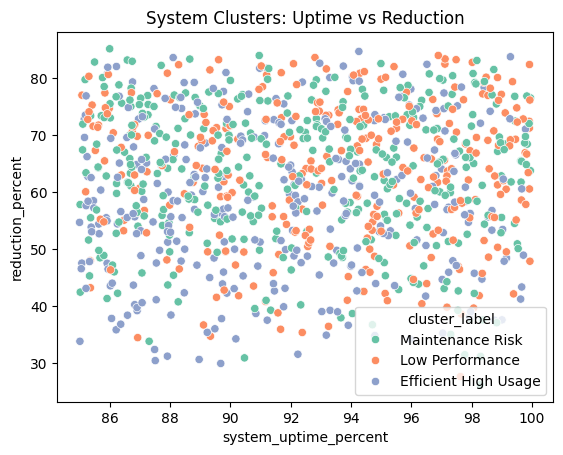

In [32]:
import seaborn as sns
sns.scatterplot(
    x="system_uptime_percent",
    y="reduction_percent",
    hue="cluster_label",
    data=data, palette="Set2")
plt.title("System Clusters: Uptime vs Reduction")
plt.show()


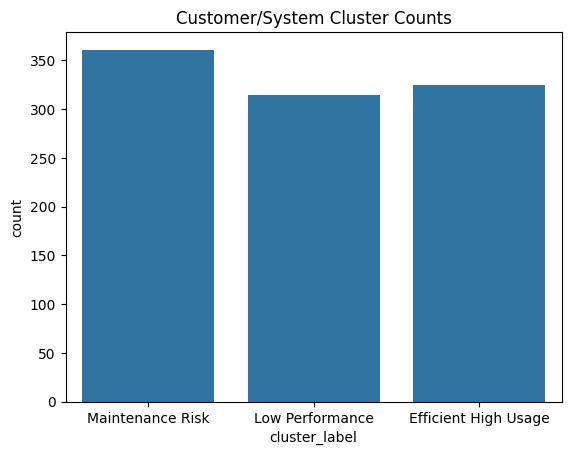

In [33]:
sns.countplot(x="cluster_label", data=data)
plt.title("Customer/System Cluster Counts")
plt.show()


In [34]:
data.to_csv("guardneer_clustered_data.csv", index=False)
